In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import qiskit
from qiskit import QuantumCircuit #Aer, IBMQ,
from qiskit.visualization import plot_histogram
from qiskit import transpile
#from qiskit.providers import fake_provider
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2, FakeTorino, FakeBrisbane
from qiskit_ibm_runtime.fake_provider import FakeFez, FakeMarrakesh
#fez, marrakesh are both Heron2
from qiskit.providers.basic_provider import BasicSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


In [2]:
import data_extract_funcs
import meta_dataframe_functions

## Meta_data dataframe

## Measuring sparsity of data

In [5]:
hdwr_8q_tor1 = pd.read_csv("../Hardware_results/8q/8q_torino1.csv")

In [7]:
non_null_vals = hdwr_8q_tor1.count()
print(non_null_vals)

00000000    50
00000001    50
00000010    50
00000011    50
00000100    50
            ..
11111011    28
11111100     4
11111101    12
11111110    38
11111111    50
Length: 256, dtype: int64


checking the percentage_non_zero for all data

1. make file names
2. extract nr qubits etc from file names
3. add directory to file names
4. load as df, get percentage non_null

Add results dataframes into meta_dataframe...

In [ ]:
def add_df_column(meta_df):
    meta_df['df'] = meta_df['file_path'].apply(pd.read_csv)
    return meta_df
def get_percentage_non_zero(df):
    df.replace(0,'')
    percentage_non_zero = 100*sum(df.count())/(df.size)
    return percentage_non_zero

def add_sparsity_column(meta_df): #df column must already exist
    meta_df['percent_non_zero']=meta_df['df'].apply(get_percentage_non_zero)
    return meta_df

def get_experiment_type(file_path):
    if 'Hardware' in file_path:
        exp_type = 'Hardware'
        return exp_type
    if 'Refreshed' in file_path:
        exp_type = 'Refreshed Sim'
        return exp_type
    if 'Simulated' in file_path:
        exp_type = 'Sim'
        return exp_type

def add_experiment_type_column(meta_df):
    meta_df['experiment_type']=meta_df['file_path'].apply(get_experiment_type)


In [4]:
df_Refr_Sim = meta_dataframe_functions.blank_meta_df()
df_Sim =meta_dataframe_functions.blank_meta_df()
df_Hardware = meta_dataframe_functions.blank_meta_df()

meta_dataframe_functions.load_meta_df(df_Refr_Sim,'Refreshed_Simulation')
meta_dataframe_functions.load_meta_df(df_Sim,'Simulation')
meta_dataframe_functions.load_meta_df(df_Hardware,'Hardware')
#df_meta_data.head(20)

df_Refr_Sim.tail()

,nr_qubits,backend,sim,circuit_type,file_path
13,16,torino,True,2,../Refreshed_Simulated_results/16q/16q_fake_to...
14,16,torino,True,3,../Refreshed_Simulated_results/16q/16q_fake_to...
15,16,brisbane,True,1,../Refreshed_Simulated_results/16q/16q_fake_br...
16,16,brisbane,True,2,../Refreshed_Simulated_results/16q/16q_fake_br...
17,16,brisbane,True,3,../Refreshed_Simulated_results/16q/16q_fake_br...


In [ ]:
#for rameez
df_Refr_Sim = meta_dataframe_functions.blank_meta_df()
meta_dataframe_functions.load_meta_df(df_Refr_Sim,'Refreshed_Simulation')


In [ ]:

dfs_all = pd.concat([df_Refr_Sim,df_Sim,df_Hardware])
add_df_column(dfs_all)
add_sparsity_column(dfs_all)
add_experiment_type_column(dfs_all)


In [104]:

dfs_all.head(50)

,nr_qubits,backend,sim,circuit_type,file_path,df,percent_non_zero,experiment_type
0,4,torino,True,1,../Refreshed_Simulated_results/4q/4q_fake_tori...,0000 0001 0010 0011 0100 0101 0110 ...,32.437500,Refreshed Sim
1,4,torino,True,2,../Refreshed_Simulated_results/4q/4q_fake_tori...,0000 0001 0010 0011 0100 0101 0110 ...,33.875000,Refreshed Sim
2,4,torino,True,3,../Refreshed_Simulated_results/4q/4q_fake_tori...,0000 0001 0010 0011 0100 0101 0110 ...,32.500000,Refreshed Sim
3,4,brisbane,True,1,../Refreshed_Simulated_results/4q/4q_fake_bris...,0000 0001 0010 0011 0100 0101 0110 ...,38.375000,Refreshed Sim
4,4,brisbane,True,2,../Refreshed_Simulated_results/4q/4q_fake_bris...,0000 0001 0010 0011 0100 0101 0110 ...,40.000000,Refreshed Sim
5,4,brisbane,True,3,../Refreshed_Simulated_results/4q/4q_fake_bris...,0000 0001 0010 0011 0100 0101 0110 ...,37.312500,Refreshed Sim
6,8,torino,True,1,../Refreshed_Simulated_results/8q/8q_fake_tori...,00000000 00000001 00000010 00000011 00...,5.097656,Refreshed Sim
7,8,torino,True,2,../Refreshed_Simulated_results/8q/8q_fake_tori...,00000000 00000001 00000010 00000011 00...,5.347656,Refreshed Sim
8,8,torino,True,3,../Refreshed_Simulated_results/8q/8q_fake_tori...,00000000 00000001 00000010 00000011 00...,4.062500,Refreshed Sim
9,8,brisbane,True,1,../Refreshed_Simulated_results/8q/8q_fake_bris...,00000000 00000001 00000010 00000011 00...,11.468750,Refreshed Sim


In [ ]:
#move file_path and df column to end
#df_meta_data[list(('nr_qubits','backend','sim','circuit_type','percent_non_zero','experiment_type','file_path','df'))]

## Plotting sparsity things

In [9]:
import seaborn as sns

<Axes: xlabel='backend', ylabel='percent_non_zero'>

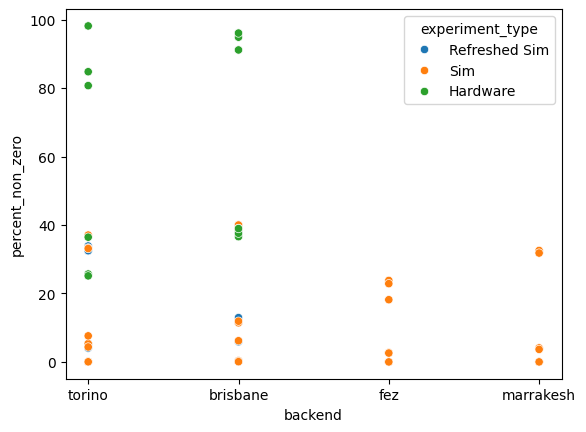

In [25]:
sns.scatterplot(dfs_all,x= "backend", y= "percent_non_zero", hue = "experiment_type")

<Axes: xlabel='circuit_type', ylabel='percent_non_zero'>

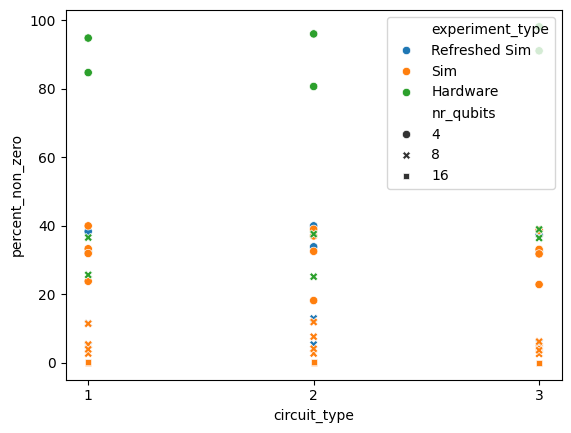

In [24]:
sns.scatterplot(dfs_all,x= "circuit_type", y= "percent_non_zero",hue = "experiment_type", style = "nr_qubits")


<Axes: xlabel='backend', ylabel='percent_non_zero'>

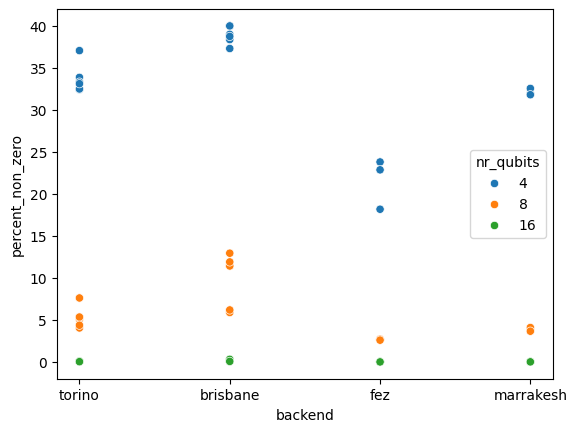

In [27]:
#dfs_all[dfs_all["sim"]==True].plot(x= "backend", y= "percent_non_zero",kind = "scatter")
sns.scatterplot(dfs_all[dfs_all["sim"]==True],x= "backend", y= "percent_non_zero", hue = "nr_qubits")

<Axes: xlabel='experiment_type', ylabel='percent_non_zero'>

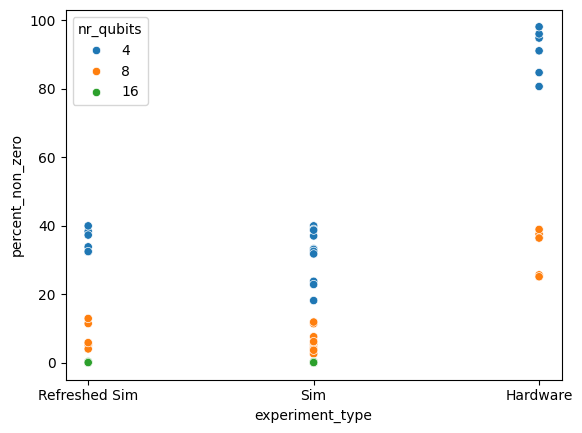

In [105]:
# dfs_all.plot(x= "experiment_type", y= "percent_non_zero",kind = "scatter")
sns.scatterplot(dfs_all,x= "experiment_type", y= "percent_non_zero", hue ="nr_qubits")

<Axes: xlabel='nr_qubits', ylabel='percent_non_zero'>

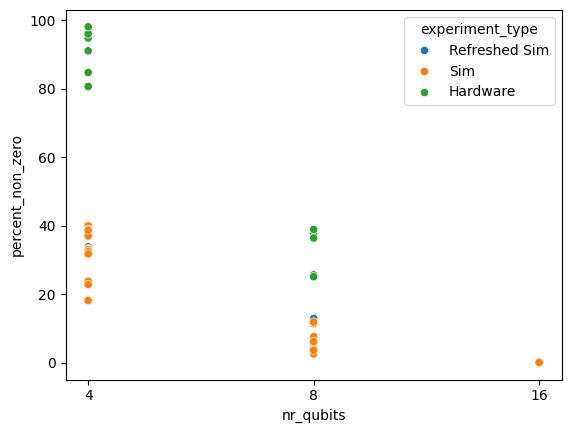

In [106]:
# dfs_all.plot(x= "nr_qubits", y= "percent_non_zero",kind = "scatter")
sns.scatterplot(dfs_all,x= "nr_qubits", y= "percent_non_zero", hue = "experiment_type" )

## Testing different methods for dealing with sparsity
### Removing null columns
Need to think how to compare all results so we are dropping the sames columns consistantly

In [124]:
df = dfs_all.loc[20,"df"]
print(get_percentage_non_zero(df))

3.67578125


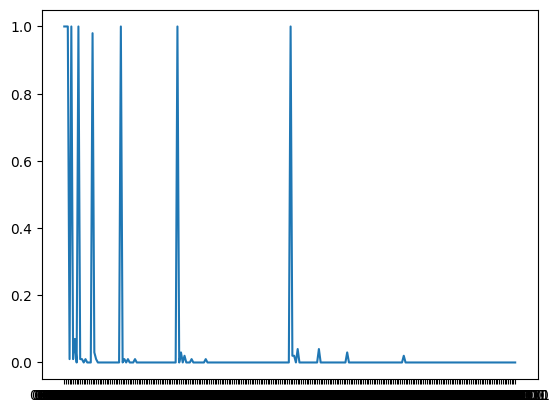

In [125]:
plt.plot(1-df.isnull().sum(0)/df.shape[0]) #percentage null per column
plt.show()

In [92]:
print(df.isnull().sum(0)/df.shape[0])

00000000    0.00
00000001    0.00
00000010    0.00
00000011    0.99
00000100    0.00
            ... 
11111011    1.00
11111100    1.00
11111101    1.00
11111110    1.00
11111111    1.00
Length: 256, dtype: float64


In [126]:

#kept_columns = df.isnull().sum(0)<10 #keep columns where there are less than 10 null entries
threshold_percentage_non_null = 0.025
kept_columns = 1-(df.isnull().sum(0)/df.shape[0]) > threshold_percentage_non_null #keep columns where there are more than threshold percent is non-null entries
df = df.loc[:,kept_columns]
df.head(30)

,00000000,00000001,00000010,00000100,00000110,00001000,00010000,00010001,00100000,01000000,01000010,10000000,10000100,10010000,10100000
0,4032,7,6,17,NaN,4,7.0,NaN,4,7,1.0,11,NaN,NaN,NaN
1,4029,8,7,12,1.0,5,6.0,NaN,4,11,NaN,13,NaN,NaN,NaN
2,4025,6,6,15,NaN,8,5.0,NaN,4,15,NaN,11,1.0,NaN,NaN
3,4014,7,8,21,NaN,5,10.0,1.0,3,11,NaN,16,NaN,NaN,NaN
4,4006,7,9,21,NaN,8,7.0,NaN,7,19,NaN,12,NaN,NaN,NaN
5,4022,4,12,13,NaN,6,11.0,NaN,4,13,NaN,10,NaN,NaN,NaN
6,4017,9,12,12,1.0,6,3.0,NaN,5,12,NaN,19,NaN,NaN,NaN
7,4021,4,12,18,NaN,7,9.0,NaN,2,15,NaN,7,NaN,NaN,NaN
8,4022,4,8,17,NaN,2,12.0,NaN,5,18,NaN,8,NaN,NaN,NaN
9,4041,9,5,13,NaN,3,4.0,NaN,4,6,NaN,11,NaN,NaN,NaN


In [120]:
print(get_percentage_non_zero(df))

90.5


try to count number of fully zero columns

In [110]:
df = dfs_all.loc[20,"df"]
fully_null_cols = df.isnull().sum(0)/df.shape[0] ==1
print(fully_null_cols.sum(0))

226


### PCA

In [ ]:
#https://note.nkmk.me/en/python-numpy-zeros-ones-full/